<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data loading</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#technical-indicators-generation" data-toc-modified-id="technical-indicators-generation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>technical indicators generation</a></span></li><li><span><a href="#normalization" data-toc-modified-id="normalization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>normalization</a></span></li><li><span><a href="#principal-components-analysis" data-toc-modified-id="principal-components-analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>principal components analysis</a></span></li></ul></li><li><span><a href="#FFNN:-feed-foreward" data-toc-modified-id="FFNN:-feed-foreward-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>FFNN: feed-foreward</a></span></li><li><span><a href="#FFNN:-Jacobian-matrixes-set-up" data-toc-modified-id="FFNN:-Jacobian-matrixes-set-up-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>FFNN: Jacobian matrixes set-up</a></span></li><li><span><a href="#FFNN:-particle-swarm-optimization" data-toc-modified-id="FFNN:-particle-swarm-optimization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>FFNN: particle swarm optimization</a></span></li><li><span><a href="#FFNN:-mini-batch-stochastic-GD" data-toc-modified-id="FFNN:-mini-batch-stochastic-GD-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>FFNN: mini-batch stochastic GD</a></span></li><li><span><a href="#ARDL:-augmented-Dicky–Fuller-test" data-toc-modified-id="ARDL:-augmented-Dicky–Fuller-test-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ARDL: augmented Dicky–Fuller test</a></span></li><li><span><a href="#Train,-validation,-test-split" data-toc-modified-id="Train,-validation,-test-split-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Train, validation, test split</a></span><ul class="toc-item"><li><span><a href="#for-ARDL-model" data-toc-modified-id="for-ARDL-model-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>for ARDL model</a></span></li><li><span><a href="#for-FFNN-model" data-toc-modified-id="for-FFNN-model-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>for FFNN model</a></span></li><li><span><a href="#clarifications-on-datasets" data-toc-modified-id="clarifications-on-datasets-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>clarifications on datasets</a></span></li></ul></li><li><span><a href="#FFNN:-back-propogation" data-toc-modified-id="FFNN:-back-propogation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>FFNN: back-propogation</a></span></li><li><span><a href="#FFNN:-hyperparameter-tunning" data-toc-modified-id="FFNN:-hyperparameter-tunning-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>FFNN: hyperparameter tunning</a></span></li><li><span><a href="#FFNN:-model-performance-on-test-set" data-toc-modified-id="FFNN:-model-performance-on-test-set-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>FFNN: model performance on test set</a></span></li><li><span><a href="#ARDL:-hyperparameter-tunning" data-toc-modified-id="ARDL:-hyperparameter-tunning-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>ARDL: hyperparameter tunning</a></span></li><li><span><a href="#ARDL:-model-performance-on-test-set" data-toc-modified-id="ARDL:-model-performance-on-test-set-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>ARDL: model performance on test set</a></span></li><li><span><a href="#Summary-of-model-performance" data-toc-modified-id="Summary-of-model-performance-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Summary of model performance</a></span></li><li><span><a href="#Results-recording" data-toc-modified-id="Results-recording-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Results recording</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#data-extraction-at-the-first-semester" data-toc-modified-id="data-extraction-at-the-first-semester-16.1"><span class="toc-item-num">16.1&nbsp;&nbsp;</span>data extraction at the first semester</a></span></li><li><span><a href="#generate-20-technical-indicators-(dirty-work)" data-toc-modified-id="generate-20-technical-indicators-(dirty-work)-16.2"><span class="toc-item-num">16.2&nbsp;&nbsp;</span>generate 20 technical indicators (dirty work)</a></span></li><li><span><a href="#code-of-MBSGD-with-plotting" data-toc-modified-id="code-of-MBSGD-with-plotting-16.3"><span class="toc-item-num">16.3&nbsp;&nbsp;</span>code of MBSGD with plotting</a></span></li></ul></li></ul></div>

In [1]:
import time
import math
import datetime 
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# https://www.5axxw.com/wiki/content/aeduov
import pandas_ta as ta

import fix_yahoo_finance as yf
import pandas_datareader.data as pdr

# https://www.statsmodels.org/stable/tsa.html#tsa-tools
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order
from statsmodels.tsa.stattools import adfuller

pd.set_option('display.max_columns',None) 

/Users/shenchen/opt/anaconda3/lib/python3.8/site-packages/fix_yahoo_finance/__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



# Data loading

In [2]:
# read data from previously downloaded files

# 6 advanced economies
df_US          = pd.read_csv('./US.csv')
df_Canada      = pd.read_csv('./Canada.csv')
df_Japan       = pd.read_csv('./Japan.csv')
df_Hong_Kong   = pd.read_csv('./Hong_Kong.csv')
df_Spain       = pd.read_csv('./Spain.csv')
df_France      = pd.read_csv('./France.csv')
# df_Netherlands = pd.read_csv('./Netherlands.csv')

# 6 emerging economies
df_Brazil      = pd.read_csv('./Brazil.csv')
df_Mexico      = pd.read_csv('./Mexico.csv')
df_China       = pd.read_csv('./China.csv')
df_Turkey      = pd.read_csv('./Turkey.csv')
df_Indonesia   = pd.read_csv('./Indonesia.csv')
df_India       = pd.read_csv('./India.csv')

In [3]:
# create list of dataframes and regions
df_list     = [df_US, df_Canada, df_Japan, df_Hong_Kong, df_Spain, df_France,
               df_Brazil, df_Mexico, df_China, df_Turkey, df_Indonesia, df_India]
region_list = ['US','Canada','Japan','Hong_Kong','Spain','France',
               'Brazil','Mexico','China','Turkey','Indonesia','India']

# add region name and change col names
for i in range(len(region_list)):
    df_list[i]['region'] = region_list[i]
    df_list[i].rename(columns = {'Adj Close':'return_next_day','Date':'datetime',
                                   'High':'high','Low':'low','Open':'open',
                                   'Close':'close','Volume':'volume'}, inplace = True)
    df_list[i]['return_next_day'] = np.nan
    df_list[i].loc[:,'return_next_day'] = df_list[i]['close'].shift(-1)
    
# select the data within the observation period 2010-2020
df_list_a = []
df_list_b = []

for i in range(len(region_list)):
    selection_logic_a = (df_list[i].datetime >= '2010-01-01') & (
        df_list[i].datetime <= '2015-12-31')
    selection_logic_b = (df_list[i].datetime >= '2015-01-01') & (
        df_list[i].datetime <= '2020-12-31')
    
    df_list_a.append(df_list[i].loc[selection_logic_a,:].reset_index(drop=True))
    df_list_b.append(df_list[i].loc[selection_logic_b,:].reset_index(drop=True))

df_list_whole = df_list_a + df_list_b

In [4]:
# count how many instances in each region
print('How many instances in each dataset')
for i in range(len(region_list)):
    print('{:<12} {:>5d} {:>5d}'.format(region_list[i]+':',
                                        df_list_a[i].shape[0],
                                        df_list_b[i].shape[0]))

How many instances in each dataset
US:           1510  1511
Canada:       1505  1506
Japan:        1469  1465
Hong_Kong:    1474  1478
Spain:        1534  1534
France:       1531  1534
Brazil:       1482  1480
Mexico:       1496  1508
China:        1454  1460
Turkey:       1510  1505
Indonesia:    1468  1456
India:        1472  1474


# Data pre-processing

## technical indicators generation

In [5]:
# using pandas_ta package as the origion paper indicates
n = 10; k = 15

# create the custom strategy for 20 technical indicators
CustomStrategy = ta.Strategy(
    name = 'could use help(ta.xxx) to check the definition & calculation',
    ta=[
        {"kind": "sma",  "length": n},
        {"kind": "ema",  "length": n},
        {"kind": "macd", "fast"  : n , "slow": k},
        {"kind": "adx",  "length": n},
        {"kind": "cci",  "length": n},
        {"kind": "mom",  "length": n},
        {"kind": "roc",  "length": n},
        {"kind": "rsi",  "length": n},
        {"kind": "tsi",  "length": n},
        {"kind": "kdj",  "length": n}, # it includes k%, d%, j%
        {"kind": "atr",  "length": n},
        {"kind": "ui" ,  "length": n},
        {"kind": "ad" ,  "length": n},
        {"kind": "obv",  "length": n}]
)

# generate technical indicators
for i in range(len(df_list_whole)):
    df_list_whole[i].ta.strategy(CustomStrategy)

In [6]:
# clean dataframes
for i in range(len(df_list_whole)):
    cols = ['region','datetime','return_next_day','high','low','open','close','SMA_10',
            'EMA_10','MACD_10_15_9','ADX_10','CCI_10_0.015','MOM_10','ROC_10','RSI_10',
            'TSI_13_25_13','K_10_3','D_10_3','J_10_3','ATRr_10','UI_10','AD','OBV']
    # delete rows b/c loosing obeservations
    df_list_whole[i] = df_list_whole[i].loc[24:df_list_whole[i].shape[0]-2, 
                                                           cols].reset_index(drop=True)

df_list_whole[0].head()

,region,datetime,return_next_day,high,low,open,close,SMA_10,EMA_10,MACD_10_15_9,ADX_10,CCI_10_0.015,MOM_10,ROC_10,RSI_10,TSI_13_25_13,K_10_3,D_10_3,J_10_3,ATRr_10,UI_10,AD,OBV
0,US,2010-02-08,1070.520020,1071.199951,1056.510010,1065.510010,1056.739990,1082.389990,1082.543306,-10.285084,57.587779,-126.654054,-40.040039,-3.650690,29.557233,-31.395445,23.118601,22.250833,24.854138,18.309764,4.539277,7.000802e+09,6.047570e+09
1,US,2010-02-09,1068.130005,1079.280029,1060.060059,1060.060059,1070.520020,1080.224988,1080.357254,-9.682590,55.953294,-62.030614,-21.650024,-1.982294,38.281123,-29.437032,29.819572,24.779520,39.899674,18.765509,4.352115,7.453144e+09,1.116183e+10
2,US,2010-02-10,1078.469971,1073.670044,1059.339966,1069.680054,1068.130005,1077.287988,1078.134118,-9.166996,54.612874,-63.139191,-29.369995,-2.676082,37.388797,-28.068852,32.959493,27.510335,43.857808,18.291329,4.225706,8.417354e+09,6.910380e+09
3,US,2010-02-11,1075.510010,1080.040039,1060.589966,1067.099976,1078.469971,1076.681982,1078.195182,-8.002039,52.043317,-22.071395,-6.060059,-0.558773,43.697528,-25.530705,40.776666,31.936939,58.456122,18.414358,3.886038,1.210772e+10,1.131125e+10
4,US,2010-02-12,1094.869995,1077.810059,1062.969971,1075.949951,1075.510010,1076.845984,1077.706969,-7.154351,49.815438,-23.171415,1.640015,0.152720,42.340556,-23.735646,44.347519,36.076600,60.889358,18.106827,3.365921,1.497868e+10,7.150570e+09


## normalization

In [7]:
# normalization
for i in range(len(df_list_whole)):
    df_list_whole[i].iloc[:,3:] = df_list_whole[i].iloc[:,3:].apply(
        lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    
df_list_whole[0].head()

,region,datetime,return_next_day,high,low,open,close,SMA_10,EMA_10,MACD_10_15_9,ADX_10,CCI_10_0.015,MOM_10,ROC_10,RSI_10,TSI_13_25_13,K_10_3,D_10_3,J_10_3,ATRr_10,UI_10,AD,OBV
0,US,2010-02-08,1070.520020,0.034717,0.040891,0.034334,0.030824,0.029683,0.029778,0.372660,1.000000,0.311842,0.503110,0.495121,0.250275,0.083159,0.198053,0.140825,0.327635,0.300260,0.446199,0.000000,0.000000
1,US,2010-02-09,1068.130005,0.042051,0.044075,0.029391,0.043258,0.027665,0.027734,0.387530,0.965846,0.431443,0.555110,0.560437,0.370464,0.105772,0.269842,0.170089,0.431743,0.312971,0.427766,0.000594,0.009810
2,US,2010-02-10,1078.469971,0.036959,0.043429,0.038115,0.041101,0.024927,0.025656,0.400255,0.937837,0.429391,0.533281,0.533276,0.358170,0.121570,0.303481,0.201692,0.459132,0.299746,0.415316,0.001862,0.001655
3,US,2010-02-11,1075.510010,0.042740,0.044550,0.035775,0.050431,0.024362,0.025713,0.429007,0.884144,0.505397,0.599191,0.616167,0.445086,0.150877,0.387229,0.252919,0.560146,0.303178,0.381862,0.006712,0.010096
4,US,2010-02-12,1094.869995,0.040716,0.046684,0.043801,0.047760,0.024515,0.025257,0.449929,0.837591,0.503361,0.620964,0.644022,0.426391,0.171604,0.425485,0.300826,0.576983,0.294601,0.330636,0.010485,0.002116


In [8]:
# there's a missing value issue, but with a very small proportion (5/2000)
# df_list_n[10]['UI_10'][df_list_n[10]['UI_10'].isna()==True]
print('How many missing values in each dataset')

for i in range(len(region_list)):
    print('{:<12} {:>5d} {:>5d}'.format(region_list[i]+':',
                                        df_list_whole[i].isna().sum().sum(),
                                        df_list_whole[i+12].isna().sum().sum()))
    # fill missing values
    df_list_whole[i]    = df_list_whole[i].   fillna(method = 'ffill', axis = 1)
    df_list_whole[i+12] = df_list_whole[i+12].fillna(method = 'ffill', axis = 1)
    
print('\nand all blanks have been filled')

How many missing values in each dataset
US:              0     0
Canada:          0     0
Japan:           2     2
Hong_Kong:       0     5
Spain:           0     0
France:          0     0
Brazil:          0     2
Mexico:          0     0
China:           0     0
Turkey:          0     0
Indonesia:       0     0
India:           0     0

and all blanks have been filled


## principal components analysis

In [9]:
def zeromean(dataframe):   
    """ 
    Args:    
    dataframe(pd.DataFrame)
    
    Returns:    
    dataframe_new(pd.DataFrame): de-meaned dataframe    
    mean(float): mean of each features
    """
    mean = np.mean(dataframe, axis = 0)     
    dataframe_new = dataframe - mean
    return dataframe_new, mean

def percentage_to_n(eig_vals, percentage):
    """
    Args:    
    eig_vals(np.array): eigenvalues of a matrix
    percentage(float): how much explanation needed
    
    Returns:    
    pca_num(int): how many eigenvectors needed to achieve the explanation
    """
    sort_eig_vals = np.sort(eig_vals)
    sort_eig_vals = sort_eig_vals[-1::-1]
    sum_eig_vals  = sum(sort_eig_vals)
    
    pca_sum = 0
    pca_num = 0
    
    for i in sort_eig_vals:
        pca_sum += i
        pca_num += 1
        if (pca_sum >= sum_eig_vals * percentage) or (pca_num >= 9):
            break
    
    return pca_num, pca_sum/sum_eig_vals
 
def pca(dataframe, percentage = 0.99):
    """
    Args:    
    dataframe(pd.DataFrame)
    percentage(float): how much explanation needed
    
    Returns:    
    low_dimen_data(pd.DataFrame): dataframe after pca
    n(int): how many eigenvectors needed to achieve the explanation
    explain_at_n (float): how much explanantion
    """
    dataframe_new, mean = zeromean(dataframe)
    
    cov_matrix = np.cov(dataframe_new.astype(float), rowvar = 0)    
    eig_vals,eig_vects = np.linalg.eig(np.mat(cov_matrix))
    
    # choose how many pcs needed to explain 99%
    n, explain_at_n = percentage_to_n(eig_vals, percentage)

    # choose top n
    eig_val_indice = np.argsort(eig_vals)
    n_eig_val_indice = eig_val_indice[-1:-(n+1):-1] 
    
    # reconstruct data
    n_eig_vect = eig_vects[:, n_eig_val_indice]
    low_dimen_data = dataframe_new @ n_eig_vect
    return low_dimen_data, n, explain_at_n

In [10]:
# x partition and y partition
array_list_x = []
array_list_y = []

for df in df_list_whole:
    array_list_x.append(np.array(pca(df.iloc[:,3:])[0].T))
    array_list_y.append(np.array(df.iloc[:,2].T))
    
# record the explanation
pca_numbers  = []
expain_power = []

for df in df_list_whole:
    pca_numbers .append(pca(df.iloc[:,3:])[1])
    expain_power.append((pca(df.iloc[:,3:])[2]*100).round(2))

PCA_result = pd.DataFrame(np.array([region_list,pca_numbers[:12],expain_power[:12],
                                   pca_numbers[12:],expain_power[12:]]).T,
                         columns = [['','Time_period_1','Time_period_1',
                                     'Time_period_2','Time_period_2'],
                                    ['Region','# of components','Cumulative variance (%)',
                                    '# of components','Cumulative variance (%)']])
PCA_result

Time_period_1                           Time_period_2  \
       Region # of components Cumulative variance (%) # of components   
0          US               8                   99.23               8   
1      Canada               9                   99.33               9   
2       Japan               9                   99.32               9   
3   Hong_Kong               9                   98.97               9   
4       Spain               9                   99.03               9   
5      France               9                   99.16               9   
6      Brazil               9                   99.08               8   
7      Mexico               9                   99.15               9   
8       China               8                    99.1               9   
9      Turkey               9                   99.05               9   
10  Indonesia               9                   99.07               9   
11      India               9                   99.26               8   

                            
   Cumulative variance (%)  
0                    99.18  
1                    99.18  
2                    99.24  
3                     99.4  
4                     99.2  
5                    99.14  
6                    99.17  
7                    99.07  
8                    99.28  
9                    99.16  
10                   99.04  
11                   99.11

In [11]:
# check dirty work using sklearn
from sklearn.decomposition import PCA
df_test = df_list_whole[0].iloc[:,3:]

pca = PCA(n_components=8)
pca_lib = pca.fit_transform(np.array(df_test))
pd.DataFrame(pca_lib).head()
# they are the same: proved

,0,1,2,3,4,5,6,7
0,1.423188,0.976080,0.211608,0.539588,-0.118650,0.338655,0.088499,-0.151315
1,1.411906,0.783664,0.295799,0.497542,-0.164498,0.282377,0.087150,-0.193571
2,1.414213,0.744439,0.283062,0.475362,-0.152694,0.303399,0.058817,-0.151822
3,1.400498,0.546770,0.333729,0.410813,-0.162157,0.273325,0.079853,-0.191837
4,1.395813,0.478080,0.300307,0.360179,-0.128357,0.294377,0.091118,-0.195252


# FFNN: feed-foreward

In [12]:
# this function defines sigmoid activation function: f(x) = 1 / (1 + e^(-x))
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# this function defines the derivative of sigmoid function
def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

# this function defines the loss function, Mean Squared Error (MSE)
def MSE(y_true, y_prediction):
    return ((y_true - y_prediction) ** 2).mean()

In [13]:
# this function initialises the network with the structure of 5 layers
# n1 is the number of neurons at the 1st hidden layer
# n2 is the number of neurons at the 2nd hidden layer
# n3 is the number of neurons at the 3rd hidden layer

## could change the neurons at each layer here
n1,  n2,  n3  = 5, 5, 5
ann_structure = [n1, n2, n3]

def parameters_reset (n1, n2, n3) :
    """ 
    Args:    
    n1,n2,n3(int): 
    how many neurons on each hidden layer
    
    Returns:    
    W1,W2,W3,W4,b1,b2,b3,b4(float): 
    parameters set (same at the each time)
    """
    # show that we are changing the global variables
    global W1, W2, W3, W4, b1, b2, b3, b4
    
    # to keep the initial parameters the same
    np.random.seed(42)
    
    W1 = np.random.randn(n1, num_input) / 2
    W2 = np.random.randn(n2, n1) / 2
    W3 = np.random.randn(n3, n2) / 2
    W4 = np.random.randn(1 , n3) / 2
    
    b1 = np.random.randn(n1, 1 ) / 2
    b2 = np.random.randn(n2, 1 ) / 2
    b3 = np.random.randn(n3, 1 ) / 2
    b4 = np.random.randn(1 , 1 ) / 2
    
# parameters_reset (n1, n2, n3)
    
# dimensions = n1 * num_input + n2 * n1 + n3 * n2 + 1 * n3 + n1 + n2 + n3 + 1
# print('hi, under this setting, totally {:} dimensions of parameter'.format(dimensions))

In [14]:
# This function realizes the Feedforward
def forward_prop (a0, W1, W2, W3, W4, b1, b2, b3, b4) :
    """ 
    Args:    
    a0(np.array): dataset (* which should be transposed)
    W1,W2,W3,W4,b1,b2,b3,b4(float): parameters
    
    Returns:    
    a0(np.array): dataset as the same as the input
    s1,a1,s2,a2,s3,a3,s4(np.array): results of FFNN
    """
    s1 = W1 @ a0 + b1
    a1 = sigmoid(s1) 
    s2 = W2 @ a1 + b2
    a2 = sigmoid(s2)
    s3 = W3 @ a2 + b3
    a3 = sigmoid(s3)
    s4 = W4 @ a3 + b4
    # since this is not a classification problem
    # I do not put activation function on the output layer
    
    # return multiple values
    return a0, s1, a1, s2, a2, s3, a3, s4

# FFNN: Jacobian matrixes set-up

In [15]:
# Jacobian for the weights of the output layer
def J_W4 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4) 
    # d s4/w4 = a3
    J = J @ a3.T / x.shape[1]
    return J

# Jacobian for the bias of the output layer
def J_b4 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4)
    # d s4/b4 = 1
    J = np.sum(J, axis=1, keepdims=True) / x.shape[1]
    return J

In [16]:
# Jacobian for the weights of the 3rd hidden layer
def J_W3 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4)
    # d s4/a3 = W4
    J = (J.T @ W4).T
    # d a3/s3 = s'(s3)
    J = J * deriv_sigmoid(s3)
    # d s3/W3 = a2
    J = J @ a2.T / x.shape[1]
    return J

# Jacobian for the bias of the 3rd hidden layer
def J_b3 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4)
    # d s4/a3 = W4
    J = (J.T @ W4).T
    # d a3/s3 = s'(s3)
    J = J * deriv_sigmoid(s3)   
    # d s3/b3 = 1
    J = np.sum(J, axis=1, keepdims=True) / x.shape[1]
    return J

In [17]:
# Jacobian for the weights of the 2nd hidden layer
def J_W2 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4)
    # d s4/a3 = W4
    J = (J.T @ W4).T
    # d a3/s3 = s'(s3)
    J = J * deriv_sigmoid(s3)
    # d s3/a2 = W3
    J = (J.T @ W3).T    
    # d a2/s2 = s'(s2)
    J = J * deriv_sigmoid(s2)  
    # d s2/W2 = a1
    J = J @ a1.T / x.shape[1]
    return J

# Jacobian for the biases of the 2nd hidden layer
def J_b2 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4)
    # d s4/a3 = W4
    J = (J.T @ W4).T
    # d a3/s3 = s'(s3)
    J = J * deriv_sigmoid(s3)
    # d s3/a2 = W3
    J = (J.T @ W3).T    
    # d a2/s2 = s'(s2)
    J = J * deriv_sigmoid(s2)  
    # d s2/b2 = 1
    J = np.sum(J, axis=1, keepdims=True) / x.shape[1]
    return J

In [18]:
# Jacobian for the weights of the 1st hidden layer
def J_W1 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4)
    # d s4/a3 = W4
    J = (J.T @ W4).T
    # d a3/s3 = s'(s3)
    J = J * deriv_sigmoid(s3)
    # d s3/a2 = W3
    J = (J.T @ W3).T    
    # d a2/s2 = s'(s2)
    J = J * deriv_sigmoid(s2)  
    # d s2/a1 = W2
    J = (J.T @ W2).T   
    # d a1/s1 = s'(s1)
    J = J * deriv_sigmoid(s1)   
    # d s1/W1 = a0
    J = J @ a0.T / x.shape[1]
    return J    

# Jacobian for the biases of the 1st hidden layer
def J_b1 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4)
    # d s4/a3 = W4
    J = (J.T @ W4).T
    # d a3/s3 = s'(s3)
    J = J * deriv_sigmoid(s3)
    # d s3/a2 = W3
    J = (J.T @ W3).T    
    # d a2/s2 = s'(s2)
    J = J * deriv_sigmoid(s2)  
    # d s2/a1 = W2
    J = (J.T @ W2).T   
    # d a1/s1 = s'(s1)
    J = J * deriv_sigmoid(s1)   
    # d s1/b1 = 1
    J = np.sum(J, axis=1, keepdims=True) / x.shape[1]
    return J

# FFNN: particle swarm optimization

In [19]:
# this function calculates MSE without gradient components
def MSE_calculation_in_PSO(ann_structure, array_x, array_y, paras):
    """ 
    Args:  
    ann_structure(list): include 3 numbers, indicating the neurons at each layer
    array_x(np.array): dataset (* which should be transposed)
    array_y(np.array): true values (* which should be transposed)
    paras(np.array): parameters
    
    Returns:    
    MSE(float): MSE at the input parameters
    """
    n1, n2, n3 = ann_structure
    num_input  = array_x.shape[0]
    # transform parameters from vector to matrix
    t1 = n1 * num_input
    t2 = t1 + n2 * n1
    t3 = t2 + n3 * n2
    t4 = t3 + n3
    t5 = t4 + n1
    t6 = t5 + n2
    t7 = t6 + n3
    t8 = t7 + 1
    
    return MSE(array_y, forward_prop(array_x, 
                                        paras[0  : t1].reshape(n1 , num_input), 
                                        paras[t1 : t2].reshape(n2 , n1), 
                                        paras[t2 : t3].reshape(n3 , n2), 
                                        paras[t3 : t4].reshape(1  , n3), 
                                        paras[t4 : t5].reshape(n1 ,  1), 
                                        paras[t5 : t6].reshape(n2 ,  1), 
                                        paras[t6 : t7].reshape(n3 ,  1), 
                                        paras[t7 : t8].reshape(1  ,  1))[7])

In [20]:
def pso(ann_structure, array_x, array_y):
    """ 
    Args:   
    ann_structure(list): include 3 numbers, indicating the neurons at each layer
    array_x(np.array): dataset (* which should be transposed)
    array_y(np.array): true values (* which should be transposed)
    
    Returns:    
    W1_pso, W2_pso, W3_pso, W4_pso, b1_pso, b2_pso, b3_pso, b4_pso(np.array): 
    parameters found by PSO
    """
    # 1. initialize the particles
    np.random.seed(42)
    
    n_particles = 50
    n1, n2, n3  = ann_structure
    num_input   = array_x.shape[0]
    dimensions  = n1 * num_input + n2 * n1 + n3 * n2 + 1 * n3 + n1 + n2 + n3 + 1

    # coordinate, [0,1]
    X = np.random.rand (dimensions, n_particles) / 2
    # velocity, from normal distribution
    V = np.random.randn(dimensions, n_particles) / 10

    # 2. period 1 initialization
    
    # p_best_loc: personal best location
    # p_best_obj: personal best objective function value
    # g_best_loc: global best location
    # g_best_obj: global best objective function value

    p_best_loc = X
    p_best_obj = np.array([MSE_calculation_in_PSO(ann_structure, 
                                                  array_x, 
                                                  array_y, 
                                                  paras) for paras in X.T])
    g_best_loc = p_best_loc[:,p_best_obj.argmin()]
    g_best_obj = p_best_obj.min()
    
    initial_loss = g_best_obj.copy()
    
    # print('hi, at the initialization, PSO finds {:4f} as MSE'.format(g_best_obj))
    
    # 3. algorithm
    
    # parameters setting
    # w: the inertia weight constant
    # it decides how much the particle should keep on with its previous velocity
    # c1: cognitive coefficient
    # it decides how much the particle should insist the search result of the particle
    # c2: social coefficients
    # it decides how much the particle should insist the search result of the swarm

    w, c1, c2, seed = 0.8, 0.1, 0.1, 0

    # iterations
    for i in range(100):
    
        # randomness in c1, c2
        np.random.seed(seed)
        r = np.random.rand(2)
    
        # velocity update
        V = w * V + c1 * r[0] * (p_best_loc - X) + \
                    c2 * r[1] * (g_best_loc.reshape(-1,1) - X)
        # position update
        X = X + V
    
        # objective at this round
        obj = np.array([MSE_calculation_in_PSO(ann_structure,
                                               array_x, 
                                               array_y, 
                                               paras) for paras in X.T])
    
        # personal best location update
        p_best_loc[:, (obj <= p_best_obj)] = X[:, (obj <= p_best_obj)]
        # personal best value update
        p_best_obj = np.array([p_best_obj, obj]).min(axis=0)
        # global best location update
        g_best_loc = p_best_loc[:,p_best_obj.argmin()]
        # global best value update
        g_best_obj = p_best_obj.min()
    
        seed += 1
    
        # print('hi, at the interation of {:}, PSO finds {:.4f} as MSE'.format(i+1, g_best_obj))
    
    t1 = n1 * num_input
    t2 = t1 + n2 * n1
    t3 = t2 + n3 * n2
    t4 = t3 + n3
    t5 = t4 + n1
    t6 = t5 + n2
    t7 = t6 + n3
    t8 = t7 + 1

        
    W1_pso = g_best_loc[0  : t1].reshape(n1 , num_input)
    W2_pso = g_best_loc[t1 : t2].reshape(n2 , n1)
    W3_pso = g_best_loc[t2 : t3].reshape(n3 , n2)
    W4_pso = g_best_loc[t3 : t4].reshape(1  , n3)
    b1_pso = g_best_loc[t4 : t5].reshape(n1 ,  1)
    b2_pso = g_best_loc[t5 : t6].reshape(n2 ,  1)
    b3_pso = g_best_loc[t6 : t7].reshape(n3 ,  1)
    b4_pso = g_best_loc[t7 : t8].reshape(1  ,  1)
    
    return W1_pso, W2_pso, W3_pso, W4_pso, b1_pso, b2_pso, b3_pso, b4_pso, initial_loss

    # print('\nthe optimal parameters have been kept within those suffixed as "_pso"')

# FFNN: mini-batch stochastic GD

In [21]:
# define the function that randomly sorts the data batches (size > 1)
# note: the data strcuture of X and y should be DataFrame
def batches(X, y, size, seed):
    """ 
    Args:    
    X(pd.DataFrame): dataset (* which should NOT be transposed)
    y(pd.DataFrame): true values (* which should NOT be transposed)
    
    Returns:    
    batches_full(list): data batches
    """
    # 1.fix this random seed at this moment, and this will be changed for each iteration
    np.random.seed(seed)
    # 2.number of total instances
    num_instances = X.shape[0]
    # 3.list initialized
    batches_full  = []
    
    # 4.shuffle X and y 
    shuf_order = list(np.random.permutation(num_instances))
    shuf_X     = X.iloc[shuf_order,:]
    shuf_y     = y.iloc[shuf_order,:]
    
    # 5.get the maximum number of the batches could be reached
    num_batch  = math.floor(num_instances / size) 
    
    # 6.get the new sorted batches
    for k in range(num_batch):
        batches_X = shuf_X.iloc[k*size : (k+1)*size-1 ,:]
        batches_y = shuf_y.iloc[k*size : (k+1)*size-1 ,:]
        batches   = (batches_X, batches_y)
        batches_full.append(batches)
        
    # 7.get the last remaining batch
    if num_instances % size != 0:
        batches_X = shuf_X.iloc[size * num_batch:,:]
        batches_y = shuf_y.iloc[size * num_batch:,:]
        batches   = (batches_X, batches_y)
        batches_full.append(batches)
        
    return batches_full

# ARDL: augmented Dicky–Fuller test

In [22]:
# make copies for ARDL model
array_list_x_ARDL = array_list_x.copy()
array_list_y_ARDL = array_list_y.copy()

In [23]:
# create ADF table on PCs
ADF_result = []

for i in range(len(array_list_y_ARDL)):
    if i <= 11:
        ADF_result.append([region_list[i], 1, int(i+1), int(100), # index y using 100
                           adfuller(array_list_y_ARDL[i], autolag='AIC')[0],
                           adfuller(array_list_y_ARDL[i], autolag='AIC')[1]])
        for j in range(len(array_list_x_ARDL[i])):
            ADF_result.append([region_list[i], 1, int(i+1), int(j+1),
                               adfuller(array_list_x_ARDL[i][j], autolag='AIC')[0],
                               adfuller(array_list_x_ARDL[i][j], autolag='AIC')[1]])
    if i >= 12:
        ADF_result.append([region_list[i-12], 2, int(i+1-12), int(100), # index y using 100
                           adfuller(array_list_y_ARDL[i], autolag='AIC')[0],
                           adfuller(array_list_y_ARDL[i], autolag='AIC')[1]])
        for j in range(len(array_list_x_ARDL[i])):
            ADF_result.append([region_list[i-12], 2, int(i+1-12), int(j+1),
                               adfuller(array_list_x_ARDL[i][j], autolag='AIC')[0],
                               adfuller(array_list_x_ARDL[i][j], autolag='AIC')[1]])    

ADF_table = pd.DataFrame(ADF_result, columns=[
    'region','time_period','region_index','variable_index','t_statistic','p_value'])
ADF_table[['t_statistic','p_value']] = ADF_table[['t_statistic','p_value']].round(2)

# check stationarity at the significance level of 5%
ADF_table[ADF_table.p_value > 0.05]

,region,time_period,region_index,variable_index,t_statistic,p_value
0,US,1,1,100,-0.73,0.84
1,US,1,1,1,-0.92,0.78
9,Canada,1,2,100,-1.93,0.32
10,Canada,1,2,1,-1.64,0.46
13,Canada,1,2,4,-0.58,0.87
19,Japan,1,3,100,-0.25,0.93
20,Japan,1,3,1,-0.69,0.85
29,Hong_Kong,1,4,100,-2.68,0.08
32,Hong_Kong,1,4,3,-1.53,0.52
39,Spain,1,5,100,-1.97,0.30


In [24]:
# make difference series of y
ADF_1_diff = []
array_list_y_ARDL_1_diff = array_list_y_ARDL.copy()

for i in range(len(array_list_y_ARDL)):
    array_list_y_ARDL_1_diff[i] = np.diff(array_list_y_ARDL[i])
    
for i in range(len(array_list_y_ARDL)):
    if i <= 11:
        ADF_1_diff.append([region_list[i], 1, int(i+1), int(100),
                           adfuller(array_list_y_ARDL_1_diff[i], autolag='AIC')[0],
                           adfuller(array_list_y_ARDL_1_diff[i], autolag='AIC')[1]])
    if i >= 12:
        ADF_1_diff.append([region_list[i-12], 2, int(i+1-12), int(100),
                           adfuller(array_list_y_ARDL_1_diff[i], autolag='AIC')[0],
                           adfuller(array_list_y_ARDL_1_diff[i], autolag='AIC')[1]])

# make difference series of non-stationary x
array_list_x_ARDL_1_diff = array_list_x_ARDL.copy()

for i in range(len(array_list_y_ARDL)):
    array_list_x_ARDL_1_diff[i] = np.diff(array_list_x_ARDL[i])
    
index_non_stationary = np.array( \
ADF_table[(ADF_table.p_value > 0.05) & (ADF_table.variable_index != 100)]\
                                [['time_period','region_index','variable_index']])

for i, j, k in index_non_stationary:
    if i == 1:
        ADF_1_diff.append([region_list[j-1], 1, j, k,
                              adfuller(array_list_x_ARDL_1_diff[j-1][k-1], autolag='AIC')[0],
                              adfuller(array_list_x_ARDL_1_diff[j-1][k-1], autolag='AIC')[1]]) 
    if i == 2:
        ADF_1_diff.append([region_list[j-1], 2, j, k,
                              adfuller(array_list_x_ARDL_1_diff[j-1+12][k-1], autolag='AIC')[0],
                              adfuller(array_list_x_ARDL_1_diff[j-1+12][k-1], autolag='AIC')[1]])      

# make a table for these
ADF_1_diff_table = pd.DataFrame(ADF_1_diff,
                         columns=['region','time_period','region_index',
                                  'variable_index','t_statistic','p_value'])

ADF_1_diff_table[['t_statistic','p_value']] = \
ADF_1_diff_table[['t_statistic','p_value']].round(2)

In [25]:
# check if 1st differenced series work
ADF_result_table = pd.merge(left  = ADF_table,
                            right = ADF_1_diff_table,
                            on = ['region','time_period','region_index','variable_index'],
                            how = 'left',
                            suffixes=['', '_1st_diff'])

ADF_result_table[ADF_result_table.p_value > 0.05]

,region,time_period,region_index,variable_index,t_statistic,p_value,t_statistic_1st_diff,p_value_1st_diff
0,US,1,1,100,-0.73,0.84,-19.81,0.0
1,US,1,1,1,-0.92,0.78,-9.22,0.0
9,Canada,1,2,100,-1.93,0.32,-19.43,0.0
10,Canada,1,2,1,-1.64,0.46,-11.06,0.0
13,Canada,1,2,4,-0.58,0.87,-10.28,0.0
19,Japan,1,3,100,-0.25,0.93,-9.95,0.0
20,Japan,1,3,1,-0.69,0.85,-13.53,0.0
29,Hong_Kong,1,4,100,-2.68,0.08,-36.76,0.0
32,Hong_Kong,1,4,3,-1.53,0.52,-15.02,0.0
39,Spain,1,5,100,-1.97,0.30,-13.76,0.0


In [26]:
# stationary dataset
array_list_y_ARDL_sta = array_list_y_ARDL_1_diff.copy()
array_list_x_ARDL_sta = array_list_x.copy()

for i in range(len(array_list_x_ARDL_sta)):
    # delete first obs for all series, including stationary ones
    array_list_x_ARDL_sta[i] = np.delete(array_list_x_ARDL_sta[i], 0, axis=1)
    for j in range(len(array_list_x_ARDL[i])):
        # transform non-stationary into stationary ones
        if (i,j) in [(i[1]-1,i[2]-1) if i[0]==1 
                     else (i[1]-1+12,i[2]-1) for i  in index_non_stationary]:
            array_list_x_ARDL_sta[i][j] = array_list_x_ARDL_1_diff[i][j]

# Train, validation, test split

## for ARDL model

In [27]:
# normalize y
# in order to keep y the same as in FFNN
for i in range(len(array_list_y_ARDL_sta)):
    np_min = np.min(array_list_y_ARDL_sta[i])
    np_max = np.max(array_list_y_ARDL_sta[i])
    array_list_y_ARDL_sta[i] = (array_list_y_ARDL_sta[i] - np_min)/(np_max - np_min)

In [28]:
# make split with 0.70:0.15:0.15

ARDL_train_x = []; ARDL_train_y = []
ARDL_val_x   = []; ARDL_val_y   = []
ARDL_test_x  = []; ARDL_test_y  = []

ARDL_total = []; ARDL_train = []
ARDL_val   = []; ARDL_test  = []

for i in range(len(array_list_y_ARDL_sta)):
    # pin down the size
    train_n = math.floor(array_list_x_ARDL_sta[i].shape[1]*0.70)
    val_n   = math.floor(array_list_x_ARDL_sta[i].shape[1]*0.15)
    # record different parts
    ARDL_total.append(array_list_x_ARDL_sta[i].shape[1])
    ARDL_train.append(train_n)
    ARDL_val.append  (val_n)
    ARDL_test.append (array_list_x_ARDL_sta[i].shape[1] - train_n - val_n)
    # train
    ARDL_train_x.append(array_list_x_ARDL_sta[i][:, :train_n]) 
    ARDL_train_y.append(array_list_y_ARDL_sta[i][:train_n]) 
    # validation
    ARDL_val_x.append  (array_list_x_ARDL_sta[i][:, train_n : (train_n+val_n)])  
    ARDL_val_y.append  (array_list_y_ARDL_sta[i][train_n : (train_n+val_n)])
    # test
    ARDL_test_x.append (array_list_x_ARDL_sta[i][:, (train_n+val_n):])  
    ARDL_test_y.append (array_list_y_ARDL_sta[i][(train_n+val_n) :])  

In [29]:
# show the sample size
ARDL_num    = np.array([region_list, ARDL_total[:12], ARDL_train[:12], ARDL_val[:12], ARDL_test[:12],
                       ARDL_total[12:], ARDL_train[12:], ARDL_val[12:], ARDL_test[12:]]).T
df_ARDL_num = pd.DataFrame(data = ARDL_num,
                           columns = [['','period_1','period_1','period_1','period_1',
                                      'period_2','period_2','period_2','period_2'],
                                      ['region','total','train','validation','test',
                                       'total','train','validation','test']])
df_ARDL_num

period_1                       period_2                      
       region    total train validation test    total train validation test
0          US     1484  1038        222  224     1485  1039        222  224
1      Canada     1479  1035        221  223     1480  1036        222  222
2       Japan     1443  1010        216  217     1439  1007        215  217
3   Hong_Kong     1448  1013        217  218     1452  1016        217  219
4       Spain     1508  1055        226  227     1508  1055        226  227
5      France     1505  1053        225  227     1508  1055        226  227
6      Brazil     1456  1019        218  219     1454  1017        218  219
7      Mexico     1470  1029        220  221     1482  1037        222  223
8       China     1428   999        214  215     1434  1003        215  216
9      Turkey     1484  1038        222  224     1479  1035        221  223
10  Indonesia     1442  1009        216  217     1430  1000        214  216
11      India     1446  1012        216  218     1448  1013        217  218

## for FFNN model

In [30]:
# change closing price to return
# in order to keep y the same as in ARDL

FFNN_array_list_x = array_list_x.copy() 
FFNN_array_list_y = array_list_y.copy() 

# make 1st diff on y and normalize it
for i in range(len(FFNN_array_list_y)):
    FFNN_array_list_y[i] = np.diff(FFNN_array_list_y[i])
    np_min = np.min(FFNN_array_list_y[i])
    np_max = np.max(FFNN_array_list_y[i])
    FFNN_array_list_y[i] = (FFNN_array_list_y[i] - np_min)/(np_max - np_min)

# delete the final obs at each independent variable
for i in range(len(FFNN_array_list_x)):
    FFNN_array_list_x[i] = np.delete(FFNN_array_list_x[i], -1, axis=1)

In [31]:
# make split with 0.70:0.15:0.15

FFNN_train_x = []; FFNN_train_y = []
FFNN_val_x   = []; FFNN_val_y   = []
FFNN_test_x  = []; FFNN_test_y  = []

FFNN_total = []; FFNN_train = []
FFNN_val   = []; FFNN_test  = []

for i in range(len(FFNN_array_list_y)):
    # pin down the size
    train_n = math.floor(FFNN_array_list_x[i].shape[1]*0.70)
    val_n   = math.floor(FFNN_array_list_x[i].shape[1]*0.15)
    # record different parts
    FFNN_total.append(FFNN_array_list_x[i].shape[1])
    FFNN_train.append(train_n)
    FFNN_val.append  (val_n)
    FFNN_test.append (FFNN_array_list_x[i].shape[1] - train_n - val_n)
    # train
    FFNN_train_x.append(FFNN_array_list_x[i][:, :train_n]) 
    FFNN_train_y.append(FFNN_array_list_y[i][:train_n]) 
    # validation
    FFNN_val_x.append  (FFNN_array_list_x[i][:, train_n : (train_n+val_n)])  
    FFNN_val_y.append  (FFNN_array_list_y[i][train_n : (train_n+val_n)])
    # test
    FFNN_test_x.append (FFNN_array_list_x[i][:, (train_n+val_n):])  
    FFNN_test_y.append (FFNN_array_list_y[i][(train_n+val_n) :])  

In [32]:
# show the sample size
FFNN_num    = np.array([region_list, FFNN_total[:12], FFNN_train[:12], FFNN_val[:12], FFNN_test[:12],
                       FFNN_total[12:], FFNN_train[12:], FFNN_val[12:], FFNN_test[12:]]).T
df_FFNN_num = pd.DataFrame(data = FFNN_num,
                           columns = [['','period_1','period_1','period_1','period_1',
                                      'period_2','period_2','period_2','period_2'],
                                      ['region','total','train','validation','test',
                                       'total','train','validation','test']])
df_FFNN_num

period_1                       period_2                      
       region    total train validation test    total train validation test
0          US     1484  1038        222  224     1485  1039        222  224
1      Canada     1479  1035        221  223     1480  1036        222  222
2       Japan     1443  1010        216  217     1439  1007        215  217
3   Hong_Kong     1448  1013        217  218     1452  1016        217  219
4       Spain     1508  1055        226  227     1508  1055        226  227
5      France     1505  1053        225  227     1508  1055        226  227
6      Brazil     1456  1019        218  219     1454  1017        218  219
7      Mexico     1470  1029        220  221     1482  1037        222  223
8       China     1428   999        214  215     1434  1003        215  216
9      Turkey     1484  1038        222  224     1479  1035        221  223
10  Indonesia     1442  1009        216  217     1430  1000        214  216
11      India     1446  1012        216  218     1448  1013        217  218

## clarifications on datasets

In [33]:
# we can see although shapes of datasets are the same for ARDL & FFNN
# the y has been kept same (took first difference and normalize)
# the inside values x can be largely different

# for later use:

# FFNN_train_x ; FFNN_train_y 
# FFNN_val_x   ; FFNN_val_y   
# FFNN_test_x  ; FFNN_test_y 

# ARDL_train_x ; ARDL_train_y 
# ARDL_val_x   ; ARDL_val_y   
# ARDL_test_x  ; ARDL_test_y  

# FFNN: back-propogation

In [34]:
# optimze FFNN using MBSGD

def FFNN_MBSGD(ann_structure, array_x, array_y):
    """ 
    Args:   
    ann_structure(list): include 3 numbers, indicating the neurons at each layer
    array_x(np.array): dataset (* which should be transposed)
    array_y(np.array): true values (* which should be transposed)
    
    Returns:    
    W1, W2, W3, W4, b1, b2, b3, b4(float): parameters
    loss_bp(list): the loss before/after the MBSGD
    initial_loss(float): initial loss before PSO
    """  
    global a0, s1, a1, s2, a2, s3, a3, s4
    global W1, W2, W3, W4, b1, b2, b3, b4
    
    # 1.MBSGD parameters setting
    learn_rate      = 0.01
    total_iteration = 100
    # PSO has found good ones, so MBSGD performs bad
    batch_size      = len(array_y)+1
    seed_bp         = 0

    # 2.initialize parameters using _pso
    W1, W2, W3, W4, b1, b2, b3, b4, initial_loss = pso(ann_structure, array_x, array_y)

    # 3.read ANN parameters from PSO and feedforeward
    a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(array_x, W1, W2, W3, W4, b1, b2, b3, b4)

    # 4.keep the initial loss
    loss_bp = [MSE(array_y, s4)]
    
    # 5.reset dataset for MINIBATCH algorithm
    df_X  = pd.DataFrame(array_x.T)
    df_y  = pd.DataFrame(array_y.T)

    # 6.backpropogation using MBSGD
    for i in range (total_iteration): 
        # split data into batches
        for Batch in batches (df_X, df_y, size = batch_size, seed = seed_bp):
        
            # get data batches
            (Batch_X, Batch_y) = Batch
            
            # transform datches into arrays
            Batch_X = np.array(Batch_X.T)
            Batch_y = np.array(Batch_y.T)
        
            # parameters update
            a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(Batch_X, W1, W2, W3, W4, b1, b2, b3, b4)
            W1 -= learn_rate * J_W1 (Batch_X, Batch_y)
            W2 -= learn_rate * J_W2 (Batch_X, Batch_y)
            W3 -= learn_rate * J_W3 (Batch_X, Batch_y)
            W4 -= learn_rate * J_W4 (Batch_X, Batch_y)
            b1 -= learn_rate * J_b1 (Batch_X, Batch_y)
            b2 -= learn_rate * J_b2 (Batch_X, Batch_y)
            b3 -= learn_rate * J_b3 (Batch_X, Batch_y)
            b4 -= learn_rate * J_b4 (Batch_X, Batch_y)
        
        # at the end of each iteration, we keep the loss for the all the instances
        a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(array_x, W1, W2, W3, W4, b1, b2, b3, b4)
        # loss = MSE(array_y, s4)
        # loss_bp.append(loss)
    
        seed_bp += 1
        # print('at the interation of {:}, MBSGD finds {:.4f} as MSE'.format(i+1, loss))
    
    loss_bp.append(MSE(array_y, s4))
    return W1, W2, W3, W4, b1, b2, b3, b4, loss_bp, initial_loss

# FFNN: hyperparameter tunning

In [35]:
# create all possible hyper-parameters in FFNN
list_hyper = [[a,a,a] for a in np.arange(3,31,3)]; list_hyper

[[3, 3, 3],
 [6, 6, 6],
 [9, 9, 9],
 [12, 12, 12],
 [15, 15, 15],
 [18, 18, 18],
 [21, 21, 21],
 [24, 24, 24],
 [27, 27, 27],
 [30, 30, 30]]

In [36]:
def FFNN_tunning(i, list_hyper):
    """ 
    Args:   
    i(int): the i-th region in the list of dataframes
    list_hyper(list): the list of hyperparameters to attempt
    
    Returns:    
    (int): the index of minimum MSE
    """  
    
    global a0, s1, a1, s2, a2, s3, a3, s4
    global W1, W2, W3, W4, b1, b2, b3, b4 
    
    MSE_FFNN_tunning = np.empty(len(list_hyper))
    
    # fit model on training set and validate performance on validation set
    for k, structure in enumerate(list_hyper):
        # fit model
        W1, W2, W3, W4, b1, b2, b3, b4, loss_bp, initial_loss = FFNN_MBSGD(
            structure,
            FFNN_train_x[i].astype(float), 
            FFNN_train_y[i].astype(float))
        # validate on validation set
        a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(
            FFNN_val_x[i].astype(float), 
            W1, W2, W3, W4, b1, b2, b3, b4)
        MSE_FFNN_tunning[k] = MSE(FFNN_val_y[i].astype(float), s4)
        #print(MSE_FFNN_tunning[k])
        
    # report the index of minimum MSE
    return np.argsort(MSE_FFNN_tunning)[0]

In [ ]:
# keep the optimal structure for each region data
FFNN_optimal_structure = []
print('record of time consuming')

for i in range(len(FFNN_train_y)):
    start = datetime.datetime.now()
    index = FFNN_tunning(i, list_hyper)
    end   = datetime.datetime.now()
    print('{:<12} {:.2f} '.format((region_list*2)[i]+':', (end - start).seconds))
    FFNN_optimal_structure.append(list_hyper[index])
    
FFNN_optimal_structure

In [37]:
# manually keep the results since the computational cost is too much
FFNN_optimal_structure = \
[[6, 6, 6],
 [30, 30, 30],
 [9, 9, 9],
 [12, 12, 12],
 [27, 27, 27],
 [3, 3, 3],
 [27, 27, 27],
 [27, 27, 27],
 [27, 27, 27],
 [9, 9, 9],
 [9, 9, 9],
 [30, 30, 30],
 [27, 27, 27],
 [30, 30, 30],
 [27, 27, 27],
 [12, 12, 12],
 [27, 27, 27],
 [30, 30, 30],
 [18, 18, 18],
 [24, 24, 24],
 [9, 9, 9],
 [30, 30, 30],
 [12, 12, 12],
 [9, 9, 9]]

# FFNN: model performance on test set

In [38]:
# keep the MSE on test set
MSE_FFNN_testing  = []
# keep the predicted values
FFNN_predict_list = []

for i in range(len(FFNN_train_y)):
    
    # whole training set = train + val
    FFNN_whole_train_x = np.hstack((FFNN_train_x[i],FFNN_val_x[i]))
    FFNN_whole_train_y = np.hstack((FFNN_train_y[i],FFNN_val_y[i]))
    
    # fit model on training set
    W1, W2, W3, W4, b1, b2, b3, b4, loss_bp, initial_loss = FFNN_MBSGD(
        FFNN_optimal_structure[i],
        FFNN_whole_train_x.astype(float), 
        FFNN_whole_train_y.astype(float))
    # test performance on test set
    a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(
        FFNN_test_x[i].astype(float), 
        W1, W2, W3, W4, b1, b2, b3, b4)
    
    MSE_FFNN_testing.append(MSE(FFNN_test_y[i].astype(float), s4))
    FFNN_predict_list.append(s4)

# ARDL: hyperparameter tunning

In [39]:
# test of 'ardl_select_order'
test_y = array_list_y_ARDL_sta[1]
test_x = array_list_x_ARDL_sta[1].T

# start  = time.process_time()
# sel_res = ardl_select_order(endog  = test_y, 
                            # maxlag = 2, 
                            # exog     = test_x,
                            # maxorder = 2, 
                            # ic = "aic",
                            # trend = "c")
# end = time.process_time()
# print("time consuming : %.2fs"%(end - start))

# !!! test showed that ardl_select_order has damaged function
# !!! thus this should not be used

In [40]:
# create all possible dictionaries for parameters in ARDL
dict_8 = [[k[0], dict(zip([0,1,2,3,4,5,6,7],k[1:]))]   for k in \
          [i for i in itertools.product([0,1,2],repeat = 9)]]

dict_9 = [[k[0], dict(zip([0,1,2,3,4,5,6,7,8],k[1:]))] for k in \
          [i for i in itertools.product([0,1,2],repeat = 10)]]

# dict_10 = [[k[0], dict(zip([0,1,2,3,4,5,6,7,8,9],k[1:]))] for k in \
          # [i for i in itertools.product([0,1,2],repeat = 11)]]

len(dict_8), len(dict_9)#, len(dict_10)

(19683, 59049)

In [ ]:
# determine the optimal parameters of each
ARDL_optimal_params = []

for i in range(len(ARDL_train_y)):
    # data
    ARDL_array_y = ARDL_train_y[i].astype(float)
    ARDL_array_x = ARDL_train_x[i].astype(float).T
    # pin down the number of PCs and dict
    count_PC  = ARDL_array_x.shape[1]
    ARDL_dict = [dict_8,dict_9][count_PC-8]
    # create the list of AICs
    AICs = np.empty(len(ARDL_dict))
    # track the time
    start  = datetime.datetime.now()
    for k in range(len(AICs)):
        AICs[k] = ARDL(endog = ARDL_array_y,
                       lags  = ARDL_dict[k][0],
                       exog  = ARDL_array_x,
                       order = ARDL_dict[k][1],
                       trend = 'c').fit().aic
        if k%1000 == 0:
            print(str(i+1)+' '+str(k)+' done')
    # track the time
    end = datetime.datetime.now()
    # print the time
    print("time consuming : %.2fs"%((end - start).seconds))
    # record the index of the smallest AIC
    index_AIC = np.argsort(AICs)[0]
    # record the parameters
    ARDL_optimal_params.append(np.array(ARDL_dict[index_AIC]))
    
print(ARDL_optimal_params)

In [41]:
# manually keep the results since the computational cost is too much
ARDL_optimal_params = [np.array([1, {0: 2, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0}], 
      dtype=object), np.array([0, {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 2, 6: 1, 7: 0, 8: 1}],
      dtype=object), np.array([0, {0: 1, 1: 2, 2: 1, 3: 2, 4: 1, 5: 1, 6: 2, 7: 0, 8: 0}],
      dtype=object), np.array([0, {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}],
      dtype=object), np.array([0, {0: 0, 1: 0, 2: 2, 3: 1, 4: 0, 5: 1, 6: 1, 7: 0, 8: 0}],
      dtype=object), np.array([0, {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}],
      dtype=object), np.array([0, {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}],
      dtype=object), np.array([0, {0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}],
      dtype=object), np.array([0, {0: 1, 1: 0, 2: 2, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0}], 
      dtype=object), np.array([0, {0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}],
      dtype=object), np.array([2, {0: 2, 1: 0, 2: 2, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1}],
      dtype=object), np.array([0, {0: 0, 1: 0, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 0, 8: 0}],
      dtype=object), np.array([0, {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2, 7: 0}], 
      dtype=object), np.array([1, {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}],
      dtype=object), np.array([0, {0: 0, 1: 0, 2: 0, 3: 1, 4: 2, 5: 0, 6: 1, 7: 2, 8: 0}],
      dtype=object), np.array([1, {0: 1, 1: 0, 2: 2, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1}],
      dtype=object), np.array([0, {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0}],
      dtype=object), np.array([0, {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0}],
      dtype=object), np.array([0, {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}], 
      dtype=object), np.array([0, {0: 2, 1: 0, 2: 1, 3: 2, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0}],
      dtype=object), np.array([0, {0: 0, 1: 1, 2: 2, 3: 2, 4: 0, 5: 0, 6: 2, 7: 0, 8: 0}],
      dtype=object), np.array([0, {0: 1, 1: 0, 2: 0, 3: 2, 4: 2, 5: 0, 6: 0, 7: 0, 8: 0}],
      dtype=object), np.array([0, {0: 0, 1: 0, 2: 0, 3: 2, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}],
      dtype=object), np.array([0, {0: 0, 1: 0, 2: 1, 3: 2, 4: 0, 5: 2, 6: 0, 7: 0}], 
      dtype=object)]

In [42]:
ARDL_region      = pd.DataFrame(region_list*2)
ARDL_dependent   = pd.DataFrame([i[0] for i in ARDL_optimal_params])
ARDL_independent = pd.DataFrame([i[1] for i in ARDL_optimal_params])
ARDL_para = pd.concat([ARDL_region,ARDL_dependent,ARDL_independent], axis=1)
ARDL_para.columns= ['PC_'+str(i+1) if i >= 0 else ['region','y'][i+2] for i in range(-2,9)]
ARDL_para.index  = [['period_1']*12+['period_2']*12, np.arange(0,24).tolist()]
ARDL_para

region  y  PC_1  PC_2  PC_3  PC_4  PC_5  PC_6  PC_7  PC_8  \
period_1 0          US  1     2     0     0     0     0     0     1     0   
         1      Canada  0     0     0     0     0     0     2     1     0   
         2       Japan  0     1     2     1     2     1     1     2     0   
         3   Hong_Kong  0     0     0     0     0     0     0     0     0   
         4       Spain  0     0     0     2     1     0     1     1     0   
         5      France  0     0     0     0     0     0     0     0     0   
         6      Brazil  0     0     0     0     0     0     0     0     0   
         7      Mexico  0     1     1     1     0     0     0     0     0   
         8       China  0     1     0     2     0     1     0     0     0   
         9      Turkey  0     0     0     1     0     0     0     0     0   
         10  Indonesia  2     2     0     2     0     1     1     1     1   
         11      India  0     0     0     1     2     1     1     1     0   
period_2 12         US  0     0     0     0     0     0     0     2     0   
         13     Canada  1     0     0     0     0     0     0     0     0   
         14      Japan  0     0     0     0     1     2     0     1     2   
         15  Hong_Kong  1     1     0     2     0     0     0     0     1   
         16      Spain  0     0     0     0     0     0     0     0     2   
         17     France  0     1     0     0     0     0     0     0     1   
         18     Brazil  0     0     0     0     0     0     0     0     0   
         19     Mexico  0     2     0     1     2     0     1     0     0   
         20      China  0     0     1     2     2     0     0     2     0   
         21     Turkey  0     1     0     0     2     2     0     0     0   
         22  Indonesia  0     0     0     0     2     0     0     0     0   
         23      India  0     0     0     1     2     0     2     0     0   

             PC_9  
period_1 0    NaN  
         1    1.0  
         2    0.0  
         3    0.0  
         4    0.0  
         5    0.0  
         6    0.0  
         7    0.0  
         8    NaN  
         9    0.0  
         10   1.0  
         11   0.0  
period_2 12   NaN  
         13   0.0  
         14   0.0  
         15   1.0  
         16   0.0  
         17   0.0  
         18   NaN  
         19   0.0  
         20   0.0  
         21   0.0  
         22   0.0  
         23   NaN

# ARDL: model performance on test set

In [43]:
# keep the MSE on test set
MSE_ARDL_testing  = []
# keep the predicted values
ARDL_predict_list = []
# keep the values of the parameters
ARDL_p_value_table =[]

for i in range(len(ARDL_train_y)):
    
    # whole training set = train + val
    ARDL_whole_train_x = np.concatenate((ARDL_train_x[i],ARDL_val_x[i]),axis = 1).T.astype(float)
    ARDL_whole_train_y = np.concatenate((ARDL_train_y[i],ARDL_val_y[i])).astype(float)
    
    ARDL_whole_x = np.hstack((ARDL_train_x[i],ARDL_val_x[i],ARDL_test_x[i])).T
    
    # fit model on training set
    ARDL_model = ARDL(endog = ARDL_whole_train_y,
                      lags  = ARDL_optimal_params[i][0], 
                      exog  = ARDL_whole_train_x,
                      order = ARDL_optimal_params[i][1],
                      trend = "c").fit()
    # record the pvalues of parameters
    ARDL_p_value_table.append(ARDL_model.summary().tables[1])
    # test performance on test set
    ARDL_predict = ARDL_model.predict(start = len(ARDL_whole_train_y), 
                                      end   = len(ARDL_whole_x) - 1,
                                      exog_oos = ARDL_whole_x)
    
    MSE_ARDL_testing.append(MSE(ARDL_test_y[i], ARDL_predict))
    ARDL_predict_list.append(ARDL_predict)

In [44]:
MSE_comparison = pd.DataFrame({'Region'  : region_list*2,
                               'MSE_FFNN': MSE_FFNN_testing,
                               'MSE_ARDL': MSE_ARDL_testing},
                              columns=['Region','MSE_FFNN','MSE_ARDL'])
MSE_comparison['ARDL-FFNN'] = MSE_comparison['MSE_ARDL'] - MSE_comparison['MSE_FFNN']
# MSE_comparison.round(6)

# Summary of model performance

In [45]:
def RMSE(true_array, predicted_array):
    error = true_array - predicted_array
    square_error = error**2
    mean_square_error = np.mean(square_error)
    root_mean_square_error = mean_square_error**(1/2)
    return root_mean_square_error

def MAPE(true_array, predicted_array):
    abs_error = np.abs(true_array - predicted_array)
    # delete the case of 0 at denominater
    abs_error  = abs_error [true_array!=0]
    true_array = true_array[true_array!=0]
    perc_abs_error = abs_error / true_array
    mean_perc_abs_error = np.mean(perc_abs_error)
    return mean_perc_abs_error

def RMSE_single(x):
    square = x**2
    mean_square = np.mean(square)
    root_mean_square = mean_square**(1/2) 
    return root_mean_square

def UofTheil(true_array, predicted_array):
    numerator_1 = RMSE(true_array, predicted_array)
    denominator_1 = RMSE_single(true_array) + RMSE_single(predicted_array)
    return numerator_1 / denominator_1

def SSE(true_array, predicted_array):
    square_error = (true_array - predicted_array)**2
    sum_square_error = np.sum(square_error)
    return sum_square_error

# a small typo in the paper!!! correct here
def ARV(true_array, predicted_array):
    numerator_2 = SSE(true_array, predicted_array)
    denominator_2 = SSE(np.mean(true_array), true_array)
    return numerator_2 / denominator_2

In [46]:
# test_set_true_values
# FFNN_test_y 
# ARDL_test_y 

# test_set_predicted_values
# FFNN_predict_list
# ARDL_predict_list

# create np.array to store the metrics
evluation_metrics = np.empty([len(region_list)*3*2,4])

for i in range(len(region_list)*2):
    
    ## FFNN get values
    true_array      = np.array([FFNN_test_y[i].T])
    predicted_array = FFNN_predict_list[i]
    
    # calculate evaluation metrics
    RMSE_i = RMSE(true_array, predicted_array)
    MAPE_i = MAPE(true_array, predicted_array)
    UofTheil_i = UofTheil(true_array, predicted_array)
    ARV_i  = ARV(true_array, predicted_array)
    
    # record the values
    evluation_metrics[3*i] = np.array([RMSE_i,MAPE_i,UofTheil_i,ARV_i])
    
    ## ARDL get values
    true_array      = ARDL_test_y[i]
    predicted_array = ARDL_predict_list[i]
    
    # calculate evaluation metrics
    RMSE_i = RMSE(true_array, predicted_array)
    MAPE_i = MAPE(true_array, predicted_array)
    UofTheil_i = UofTheil(true_array, predicted_array)
    ARV_i  = ARV(true_array, predicted_array)
    
    # record the values
    evluation_metrics[3*i+1] = np.array([RMSE_i,MAPE_i,UofTheil_i,ARV_i])
    evluation_metrics[3*i+2] = evluation_metrics[3*i+1] - evluation_metrics[3*i]

In [47]:
df_evaluation = pd.DataFrame(np.concatenate((evluation_metrics[36:],
                                             evluation_metrics[:36]),axis=1),
                             columns=[['period_1','period_1','period_1','period_1',
                                      'period_2','period_2','period_2','period_2'],
                                      ['RMSE','MAPE','UofTheil','ARV',
                                       'RMSE','MAPE','UofTheil','ARV']],
                             index=[[i for i in region_list for _ in range(3)],
                                    ['FFNN','ARDL','compare']*len(region_list)])
df_evaluation.round(5)

period_1                            period_2           \
                      RMSE     MAPE UofTheil      ARV     RMSE     MAPE   
US        FFNN     0.11561  0.15923  0.09706  1.00054  0.12786  0.37560   
          ARDL     0.11587  0.15800  0.09791  1.00504  0.12967  0.36820   
          compare  0.00026 -0.00123  0.00085  0.00451  0.00181 -0.00741   
Canada    FFNN     0.09894  0.18642  0.08650  1.00011  0.12793  0.27383   
          ARDL     0.09906  0.18603  0.08679  1.00248  0.12864  0.27369   
          compare  0.00012 -0.00039  0.00030  0.00238  0.00071 -0.00014   
Japan     FFNN     0.12524  0.26533  0.13006  1.00186  0.10132  0.19861   
          ARDL     0.12666  0.26408  0.13210  1.02481  0.10252  0.19886   
          compare  0.00143 -0.00125  0.00204  0.02296  0.00120  0.00024   
Hong_Kong FFNN     0.13180  0.20835  0.10827  0.99802  0.13131  0.18416   
          ARDL     0.14492  0.22702  0.11926  1.20656  0.13057  0.18096   
          compare  0.01312  0.01867  0.01099  0.20854 -0.00075 -0.00320   
Spain     FFNN     0.09632  0.19330  0.07390  1.00237  0.07145  0.19750   
          ARDL     0.09592  0.19145  0.07378  0.99396  0.07230  0.19944   
          compare -0.00040 -0.00184 -0.00012 -0.00841  0.00084  0.00194   
France    FFNN     0.10642  0.13448  0.08792  1.00107  0.11748  0.25439   
          ARDL     0.10690  0.13617  0.08829  1.01020  0.11829  0.25548   
          compare  0.00048  0.00170  0.00037  0.00913  0.00081  0.00109   
Brazil    FFNN     0.11359  0.28428  0.10095  1.00044  0.10122  0.13626   
          ARDL     0.11405  0.28642  0.10124  1.00862  0.10235  0.13713   
          compare  0.00046  0.00214  0.00029  0.00818  0.00113  0.00087   
Mexico    FFNN     0.14484  0.36384  0.11105  1.00006  0.09886  0.14368   
          ARDL     0.14698  0.37189  0.11260  1.02979  0.09911  0.14261   
          compare  0.00214  0.00804  0.00155  0.02973  0.00024 -0.00106   
China     FFNN     0.06769  0.08152  0.05543  1.00432  0.16927  0.49889   
          ARDL     0.10811  0.10932  0.08772  2.56200  0.16998  0.49720   
          compare  0.04042  0.02780  0.03229  1.55768  0.00072 -0.00169   
Turkey    FFNN     0.06516  0.00586  0.03403  1.00476  0.08270  0.10335   
          ARDL     0.06507  0.00612  0.03398  1.00218  0.08249  0.10219   
          compare -0.00008  0.00025 -0.00005 -0.00258 -0.00021 -0.00117   
Indonesia FFNN     0.11635  0.20166  0.12062  0.99925  0.10813  0.16621   
          ARDL     0.11765  0.21155  0.12057  1.02175  0.11934  0.18015   
          compare  0.00130  0.00988 -0.00005  0.02250  0.01120  0.01393   
India     FFNN     0.10921  0.13873  0.08779  1.01129  0.11681  0.13433   
          ARDL     0.10871  0.13667  0.08731  1.00211  0.11745  0.13354   
          compare -0.00050 -0.00207 -0.00048 -0.00918  0.00064 -0.00079   

                                     
                  UofTheil      ARV  
US        FFNN     0.11983  1.00108  
          ARDL     0.12191  1.02958  
          compare  0.00208  0.02851  
Canada    FFNN     0.12424  1.01011  
          ARDL     0.12524  1.02131  
          compare  0.00100  0.01120  
Japan     FFNN     0.10827  1.00026  
          ARDL     0.11053  1.02412  
          compare  0.00226  0.02386  
Hong_Kong FFNN     0.11008  1.00499  
          ARDL     0.10958  0.99359  
          compare -0.00049 -0.01140  
Spain     FFNN     0.10526  0.99963  
          ARDL     0.10666  1.02337  
          compare  0.00140  0.02374  
France    FFNN     0.13374  1.00196  
          ARDL     0.13521  1.01579  
          compare  0.00147  0.01382  
Brazil    FFNN     0.08210  0.99942  
          ARDL     0.08299  1.02187  
          compare  0.00088  0.02245  
Mexico    FFNN     0.08582  0.99885  
          ARDL     0.08602  1.00374  
          compare  0.00020  0.00489  
China     FFNN     0.13620  0.99974  
          ARDL     0.13754  1.00824  
          compare  0.00134  0.00850  
Turkey    FFNN     0.06333  1.00475  
          ARDL     0.06316 

# Results recording

In [48]:
today = datetime.date.today().strftime('%y-%m-%d')

PCA_result.to_excel('PCA_'+today+'.xlsx')
ADF_result_table.to_excel('ADF_'+today+'.xlsx')
df_ARDL_num.to_excel('ARDL_instance_'+today+'.xlsx')
df_FFNN_num.to_excel('FFNN_instance_'+today+'.xlsx')
ARDL_para.to_excel('ARDLpara_'+today+'.xlsx')
df_evaluation.to_excel('evaluation_'+today+'.xlsx')

In [49]:
outputfile = pd.ExcelWriter('ARDL_p_values_'+today+'.xlsx')

for i, df in enumerate(ARDL_p_value_table):
    sheet_name = 'sheet '+ str(i)
    results_as_html = df.as_html()
    results_as_df   = pd.read_html(results_as_html, header=0, index_col=0)[0]
    results_as_df.to_excel(outputfile, sheet_name = sheet_name)

outputfile.save()
# outputfile.close()

# Appendix

## data extraction at the first semester

In [109]:
import pandas as pd
import pandas_datareader.data as pdr

import datetime   
import fix_yahoo_finance as yf   
  
start = datetime.datetime(1999,  1,  1)   
end   = datetime.datetime(2021,  9,  1)   

In [110]:
symbol_dict = {'US':'^GSPC',        'Canada':'^GSPTSE',  'Japan':'^N225',     'Hong Kong':'^HSI',
               'Sweden':'^OMX',      'France':'^FCHI',    'Netherlands':'^AEX','Spain':'^IBEX',
               # advanced
               'Brazil':'^BVSP',    'Mexico':'^MXX',     'China':'000001.SS', 'Turkey':'XU100.IS',
               'Indonesia':'^JKII', 'India':'^BSESN'}
               # emerging

data_list   = [i for i in range(14)]
i = 0

In [ ]:
# it fails currently

# for con, sym in symbol_dict.items():
    # data_list[i] = pd.DataFrame(pdr.get_data_yahoo(sym,start,end))
    # i = i + 1
    # print(con, sym, pdr.get_data_yahoo(sym,start,end).index[0].date(), pdr.get_data_yahoo(sym,start,end).index[-1].date())

In [90]:
df_US          = data_list[0]
df_Canada      = data_list[1]
df_Japan       = data_list[2]
df_Hong_Kong   = data_list[3]
df_Spain       = data_list[4]
df_France      = data_list[5]
df_Netherlands = data_list[6]
df_Brazil      = data_list[7]
df_Mexico      = data_list[8]
df_China       = data_list[9]
df_Turkey      = data_list[10]
df_Indonesia   = data_list[11]
df_India       = data_list[12]

In [94]:
df_US.to_csv('./US.csv')
df_Canada.to_csv('./Canada.csv')
df_Japan.to_csv('./Japan.csv')
df_Hong_Kong.to_csv('./Hong_Kong.csv')
df_Spain.to_csv('./Spain.csv')
df_France.to_csv('./France.csv')
df_Netherlands.to_csv('./Netherlands.csv')
df_Brazil.to_csv('./Brazil.csv')
df_Mexico.to_csv('./Mexico.csv')
df_China.to_csv('./China.csv')
df_Turkey.to_csv('./Turkey.csv')
df_Indonesia.to_csv('./Indonesia.csv')
df_India.to_csv('./India.csv')

## generate 20 technical indicators (dirty work)

In [ ]:
n = 10
k = 15

# 1.SMAt(n)
for region in region_list: 
    df_full.loc[df_full.Region == region,'SMA'] = \
    df_full[df_full.Region == region]['Close'].rolling(window = n).mean()

# 2.EMAt(n)
alpha_1 = 2/(n+1)
for region in region_list: 
    df_full.loc[df_full.Region == region,'EMA_10'] = \
    df_full.loc[df_full.Region == region,'Close'].ewm(alpha=alpha_1,adjust=False).mean()

alpha_2 = 2/(k+1)
for region in region_list: 
    df_full.loc[df_full.Region == region,'EMA_15'] = \
    df_full.loc[df_full.Region == region,'Close'].ewm(alpha=alpha_2,adjust=False).mean()
    
# 3.MACDt(n,k)
for region in region_list: 
    df_full.loc[df_full.Region == region,'MACD'] = \
    df_full.loc[df_full.Region == region,'EMA_10'] - \
    df_full.loc[df_full.Region == region,'EMA_15']

# 4.ATRt(n)
# TR
for region in region_list: 
    df_full.loc[df_full.Region == region, 'TR'] = \
    pd.concat([(df_full.loc[df_full.Region == region]['High'] - df_full.loc[df_full.Region == region]['Low']),
                abs(df_full.loc[df_full.Region == region]['High'] - df_full.loc[df_full.Region == region]['Close'].shift(+1)),
                abs(df_full.loc[df_full.Region == region]['Low']  - df_full.loc[df_full.Region == region]['Close'].shift(+1))], \
              axis = 1).max(axis=1)
    
df_full.head()

## code of MBSGD with plotting

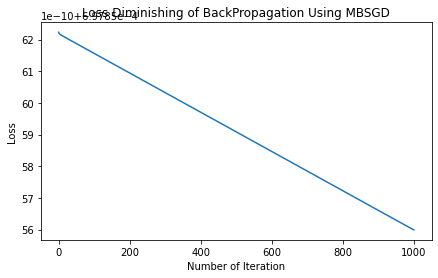

In [271]:
# volatility is pretty HIGH...
# but it may be because PSO has find a good solution

# optimze FFNN using MBSGD

# test using US dataset
array_x = FFNN_train_x[0]
array_y = FFNN_train_y[0]

# 1.MBSGD parameters setting
learn_rate      = 0.01
total_iteration = 1000
batch_size      = len(array_y)+1
seed_bp         = 0

# 2.initialize parameters using _pso
W1, W2, W3, W4, b1, b2, b3, b4 = pso(array_x, array_y)

# 3.read ANN parameters from PSO and feedforeward
a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(array_x, W1, W2, W3, W4, b1, b2, b3, b4)

# 4.keep the initial loss
loss_bp = [MSE(array_y, s4)]

# 5.reset dataset for MINIBATCH algorithm
df_X  = pd.DataFrame(array_x.T)
df_y  = pd.DataFrame(array_y.T)

# 6.backpropogation using MBSGD
for i in range (total_iteration): 
    # split data into batches
    for Batch in batches (df_X, df_y, size = batch_size, seed = seed_bp):
        
        # get data batches
        (Batch_X, Batch_y) = Batch
        # transform datches into arrays
        Batch_X = np.array(Batch_X).T
        Batch_y = np.array(Batch_y).T
        
        # parameters update
        a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(Batch_X, W1, W2, W3, W4, b1, b2, b3, b4)
        W1 -= learn_rate * J_W1 (a0, Batch_y)
        W2 -= learn_rate * J_W2 (a0, Batch_y)
        W3 -= learn_rate * J_W3 (a0, Batch_y)
        W4 -= learn_rate * J_W4 (a0, Batch_y)
        b1 -= learn_rate * J_b1 (a0, Batch_y)
        b2 -= learn_rate * J_b2 (a0, Batch_y)
        b3 -= learn_rate * J_b3 (a0, Batch_y)
        b4 -= learn_rate * J_b4 (a0, Batch_y)
        
    # at the end of each iteration, we keep the loss for the all the instances
    a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(array_x, W1, W2, W3, W4, b1, b2, b3, b4)
    loss = MSE(array_y, s4)
    loss_bp.append(loss)
    
    seed_bp += 1
    # print('at the interation of {:}, MBSGD finds {:.4f} as MSE'.format(i+1, loss))

# 6.plot the diagram of iteration and lossfuntion
plt.figure(figsize = (7,4))
plt.title ('Loss Diminishing of BackPropagation Using MBSGD')
plt.xlabel('Number of Iteration')
plt.ylabel('Loss')
plt.plot(range(1001), loss_bp)